In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Checking any missing values or not

<AxesSubplot:>

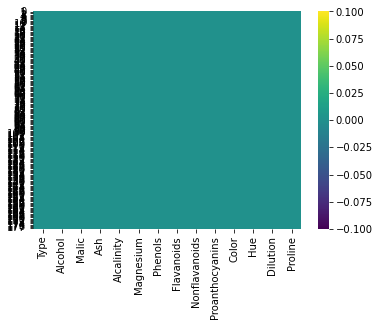

In [3]:
sns.heatmap(df.isnull(),yticklabels=True,cmap="viridis")#No any missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### Correlation plot

<AxesSubplot:>

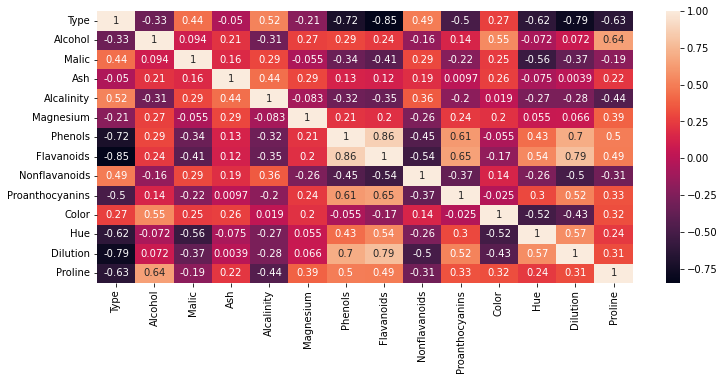

In [7]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

### Checking the unique values and then apply feature scaling

In [8]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [10]:
df["Nonflavanoids"].unique()

array([0.28, 0.26, 0.3 , 0.24, 0.39, 0.34, 0.31, 0.29, 0.22, 0.43, 0.33,
       0.4 , 0.32, 0.17, 0.25, 0.27, 0.47, 0.37, 0.42, 0.5 , 0.2 , 0.21,
       0.19, 0.63, 0.53, 0.45, 0.55, 0.14, 0.13, 0.35, 0.61, 0.48, 0.52,
       0.58, 0.66, 0.6 , 0.41, 0.44, 0.56])

In [11]:
df.shape

(178, 14)

In [12]:
def normal_scale(value):
    return((value-value.mean())/(value.std()))

In [13]:
df_scale=normal_scale(df[["Alcohol",'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Proanthocyanins', 'Color',
       'Dilution', 'Proline']])
df_scale['Type']=df["Type"] 
df_scale['Nonflavanoids']=df["Nonflavanoids"]
df_scale['Hue']=df["Hue"]
df_scale.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Proanthocyanins,Color,Dilution,Proline,Type,Nonflavanoids,Hue
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,1.221438,0.251009,1.842721,1.010159,1,0.28,1.04
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.543189,-0.292496,1.110317,0.962526,1,0.26,1.05
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,2.129959,0.268263,0.786369,1.391224,1,0.30,1.03
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,1.029251,1.182732,1.180741,2.328007,1,0.24,0.86
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.400275,-0.318377,0.448336,-0.037767,1,0.39,1.04


In [14]:
df.shape

(178, 14)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(0.95)#give me 95% variation

In [17]:
pca.fit(df_scale)

PCA(n_components=0.95)

In [18]:
pca_fit=pca.fit_transform(df_scale)
pca_fit

array([[ 3.51163165,  1.017697  , -0.19128645, ..., -0.10101526,
         0.78423483, -0.60244491],
       [ 2.18090315, -0.6118431 , -2.03269065, ..., -0.36042032,
        -0.66173037, -0.10182128],
       [ 2.75641682,  0.67265206,  0.94810349, ...,  1.16914033,
        -0.63805238, -0.15923958],
       ...,
       [-2.27548782,  2.8186875 , -0.82729871, ..., -0.2054564 ,
        -0.15987583,  0.55448905],
       [-1.7997808 ,  2.27488571, -0.61925005, ...,  0.03272409,
        -0.0523065 ,  0.1901492 ],
       [-2.48384738,  2.86630377,  0.89843143, ..., -0.32440581,
         0.45947222, -0.35698017]])

In [19]:
pca.n_components_

9

In [20]:
pca.explained_variance_ratio_

array([0.38519213, 0.19799244, 0.12166252, 0.07191904, 0.06246592,
       0.05482594, 0.02740062, 0.02609556, 0.01967763])

In [21]:
cum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=2))
cum_var

array([0.39, 0.59, 0.71, 0.78, 0.84, 0.89, 0.92, 0.95, 0.97])

In [22]:
final_df=pd.DataFrame({"Type":df_scale["Type"],"PC1":pca_fit[:,0],"PC2":pca_fit[:,1],"PC3":pca_fit[:,3]})
final_df

,Type,PC1,PC2,PC3
0,1,3.511632,1.017697,0.705500
1,1,2.180903,-0.611843,0.118024
2,1,2.756417,0.672652,-0.590221
3,1,4.213127,2.035939,-0.399437
4,1,1.393422,0.799201,0.455214
...,...,...,...,...
173,3,-2.826181,2.364524,-1.536645
174,3,-2.388068,1.937806,-0.332061
175,3,-2.275488,2.818688,0.392571
176,3,-1.799781,2.274886,1.264339


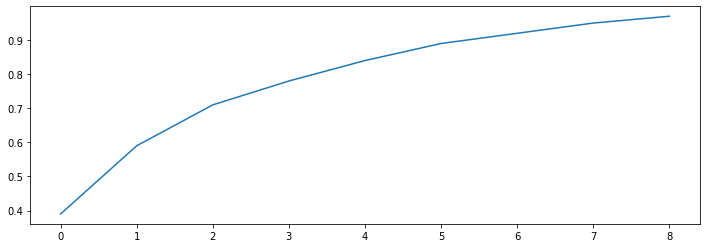

In [23]:
plt.figure(figsize=(12,4))
plt.plot(cum_var)

<AxesSubplot:>

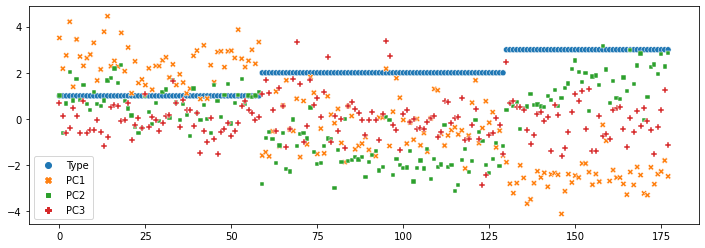

In [24]:
plt.figure(figsize=(12,4))

sns.scatterplot(data=final_df)

   ### Heirarchichal clustering

### For original dataset

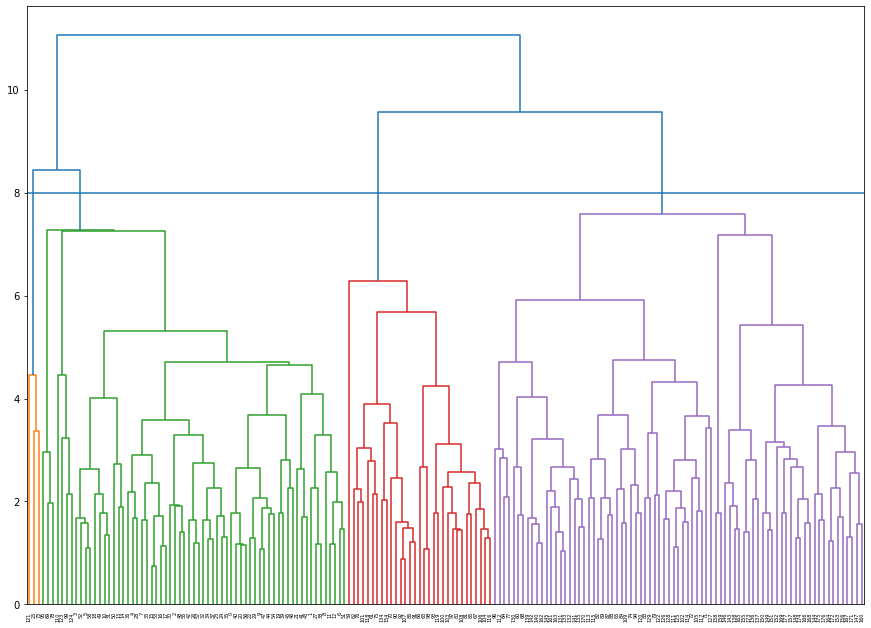

In [25]:
linked=linkage(df_scale,"complete")
# labellist=range(1,59)
plt.figure(figsize=(15,11))
dendrogram(linked)
plt.axhline(y=8)
plt.show()

### After applying pca dataset and first 3 pca

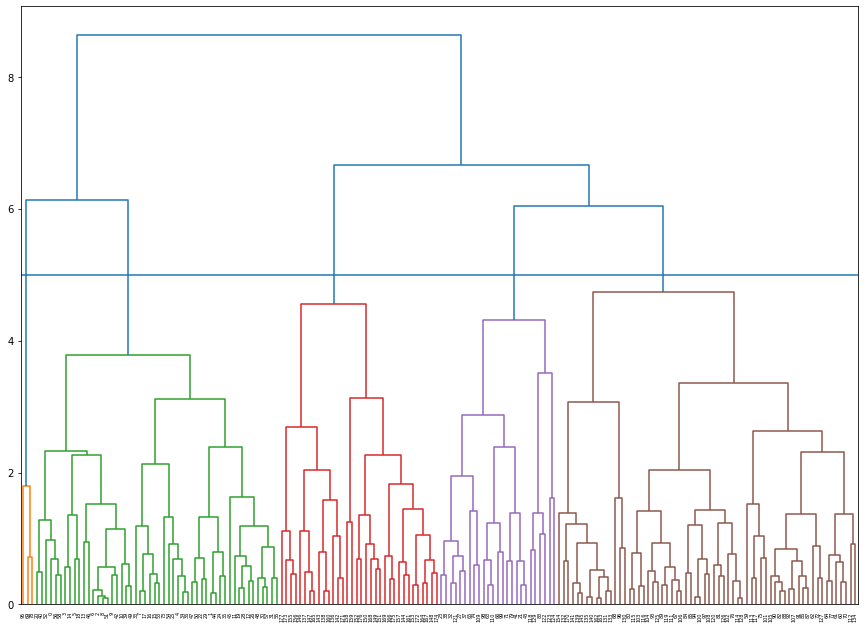

In [26]:
linked1=linkage(final_df[["PC1","PC2","PC3"]],"complete")
# labellist=range(1,59)
plt.figure(figsize=(15,11))
dendrogram(linked1)
plt.axhline(y=5)
plt.show()

## AGGLOMERATIVE CLUSTERING TO THE PCA DATA

In [27]:
k=3

In [28]:
hclustering=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="complete")
hclustering.fit(final_df[["PC1","PC2","PC3"]])

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [29]:
cluster_no=hclustering.fit_predict(final_df[["PC1","PC2","PC3"]])

In [30]:
final_df["cluster_agglo"]=cluster_no
final_df.head()

,Type,PC1,PC2,PC3,cluster_agglo
0,1,3.511632,1.017697,0.705500,0
1,1,2.180903,-0.611843,0.118024,0
2,1,2.756417,0.672652,-0.590221,0
3,1,4.213127,2.035939,-0.399437,0
4,1,1.393422,0.799201,0.455214,0


### NOW SAME NUMBER OF CLUSTER VALUE K=3 APPLIED TO THE ORIGINAL NORMALIZED DATASET

In [31]:
hclustering_org=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="complete")
hclustering_org.fit(df_scale)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [32]:
cluster_agglo_org=hclustering_org.fit_predict(df_scale)

In [33]:
df_cluster_agglo_org=pd.DataFrame({"Type":df_scale["Type"],"Cluster_org_agglo":cluster_agglo_org})
df_cluster_agglo_org.head()

,Type,Cluster_org_agglo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


<AxesSubplot:xlabel='Alcohol', ylabel='Dilution'>

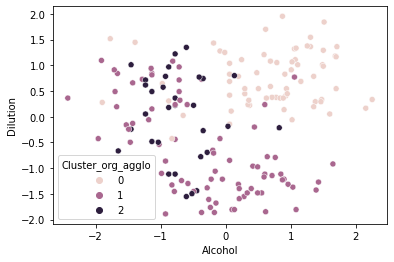

In [34]:
sns.scatterplot(df_scale["Alcohol"],df_scale["Dilution"],hue=df_cluster_agglo_org["Cluster_org_agglo"])

## K-means clustering algorithm to the PCA dataset

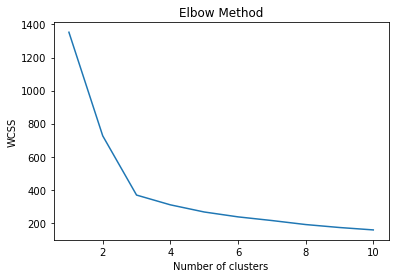

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(final_df[["PC1","PC2","PC3"]])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Here we see k=3

In [36]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(final_df)

KMeans(n_clusters=3, random_state=42)

In [37]:
cluster_k_means=clusters_new.predict(final_df)
final_df["cluster_label_kmean"]=cluster_k_means


In [39]:
final_df.head()

,Type,PC1,PC2,PC3,cluster_agglo,cluster_label_kmean
0,1,3.511632,1.017697,0.705500,0,2
1,1,2.180903,-0.611843,0.118024,0,2
2,1,2.756417,0.672652,-0.590221,0,2
3,1,4.213127,2.035939,-0.399437,0,2
4,1,1.393422,0.799201,0.455214,0,2


### Pairplot according to the kmeans clustering to the PCA dataset

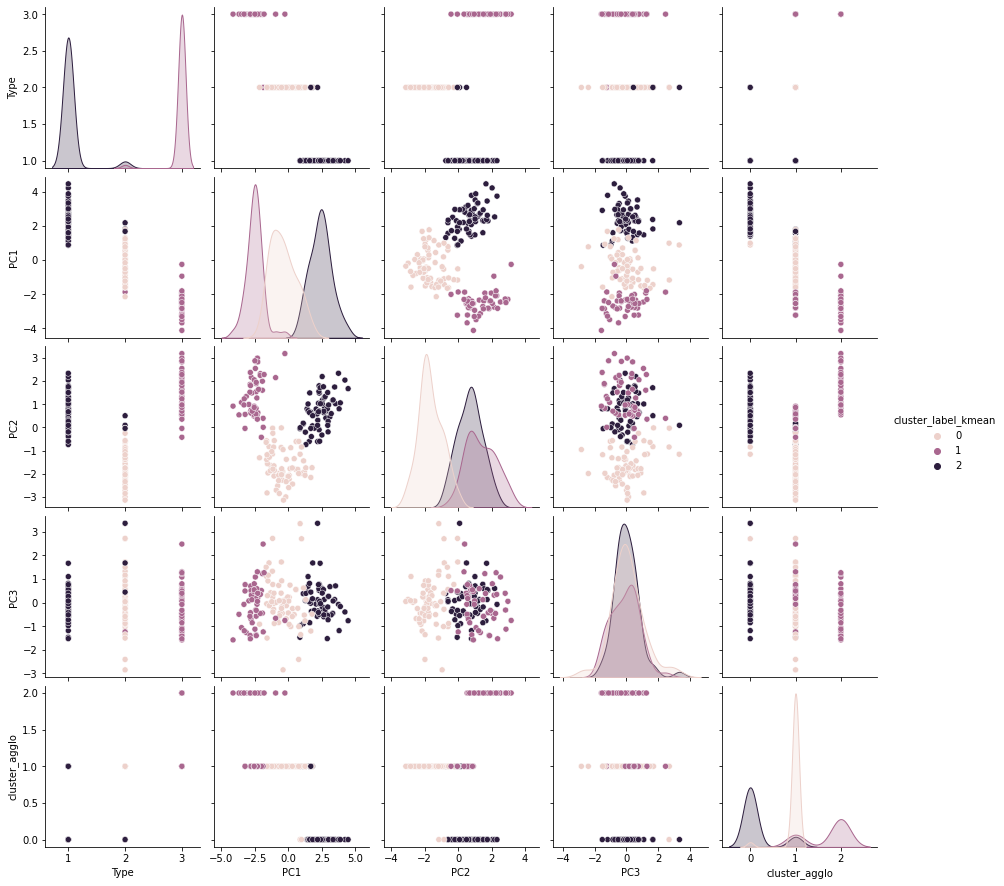

In [40]:
sns.pairplot(final_df,hue="cluster_label_kmean")

### Pairplot according to the agglomerative clustering to the PCA dataset

Text(0.5, 1.0, 'Pairplot according to the agglomerative clustering to the PCA dataset')

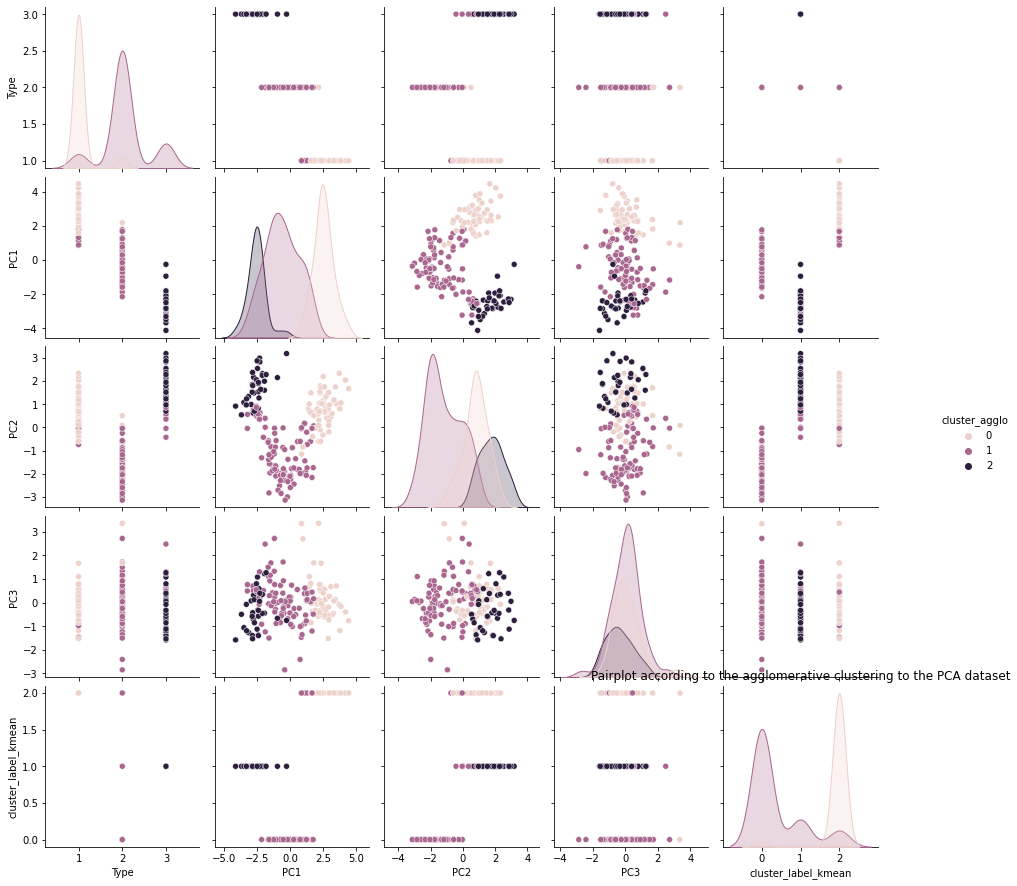

In [41]:
sns.pairplot(final_df,hue="cluster_agglo" )
plt.title("Pairplot according to the agglomerative clustering to the PCA dataset")

### Now applying kmeans clustering with this k=3 in the original normalized dataset

In [42]:
clusters_new_org = KMeans(3, random_state=42)
clusters_new_org.fit(df_scale)

KMeans(n_clusters=3, random_state=42)

In [43]:
clusters_new_org.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [44]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [45]:
df_cluster_KMEANS_org=pd.DataFrame({"Type":df_scale["Type"],"Cluster_org_KMEANS":clusters_new_org.labels_})
df_cluster_KMEANS_org.head()

,Type,Cluster_org_KMEANS
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


<AxesSubplot:xlabel='Alcohol', ylabel='Dilution'>

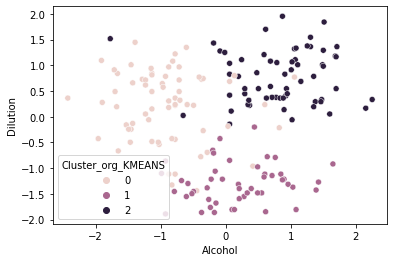

In [46]:
sns.scatterplot(df_scale["Alcohol"],df_scale["Dilution"],hue=df_cluster_KMEANS_org["Cluster_org_KMEANS"])